In [1]:
from iwc2tb.GMI.gmiData import gmiData
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 18})


In [2]:
batchSize          = 256
inputs             = np.array( ["ta", "t2m",  "wvp", "z0", "lat",  "stype"])
outputs            = "iwp"
xlog               = True
latlims            = [0, 65]

In [3]:
lpa_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)

    
pr1_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa_pr1.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)
   

 

{0: (268.3808284294322, 20.713799753193864), 1: (264.7689527353239, 23.75236521724375), 2: (265.2646024739606, 14.314022213058164), 3: (256.97691366283385, 9.810305651981883), 4: (286.32800607278887, 14.497505671007154), 5: (22.580422767573513, 16.37695971949476), 6: (163.75704659185553, 451.2063182451618), 7: (0.45358731515610035, 37.64948813282385)}
{0: (268.2685589376968, 20.897996496607092), 1: (264.9252559906644, 23.534937978889193), 2: (265.18046809007046, 14.525372731300099), 3: (256.938044744816, 9.951655033163178), 4: (286.3364376798726, 14.486471359958681), 5: (22.583387791068365, 16.369952395432367), 6: (163.33999908920353, 450.21441871498007), 7: (0.42024401898164904, 37.64943806630241)}


In [4]:
esa_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_esa.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)
   
 
#esa_pr1_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_test_jan_esa_pr1.nc"), 
#                             inputs, 
#                             outputs,
#                             batch_size = batchSize,
#                             latlims = latlims,)

{0: (268.5676871680348, 20.293831092706814), 1: (264.974662978649, 23.313264931682042), 2: (265.4530571632145, 13.758208692634417), 3: (257.05739289651797, 9.45502813926322), 4: (286.3129319424382, 14.495873546238812), 5: (22.564311828462827, 16.375402352734177), 6: (164.17300322756427, 452.12711641524135), 7: (0.5117655376735298, 37.668732948065895)}


In [5]:
lsm = np.argmax(pr1_data.stype, axis = 1)
tb  = pr1_data.add_noise(pr1_data.x[:, :4], [0, 1, 2, 3])
mask = (lsm == 0) 

lsm1 = np.argmax(lpa_data.stype, axis = 1)
tb1  = lpa_data.add_noise(lpa_data.x[:, :4], [0, 1, 2, 3])
mask1 = (lsm == 0) 



In [6]:
tb_esa   = esa_data.add_noise(esa_data.x[:, :4], [0, 1, 2, 3])
#tb_esa1  = esa_pr1_data.add_noise(lpa_data.x[:, :4], [0, 1, 2, 3])



In [7]:
tb

array([[287.79684, 287.36914, 282.5276 , 276.9437 ],
       [279.54276, 279.45743, 270.90414, 256.66547],
       [269.2346 , 268.2557 , 261.85635, 250.86574],
       ...,
       [270.71695, 265.98758, 265.40936, 255.40991],
       [255.16795, 239.76907, 256.4724 , 248.5812 ],
       [280.08655, 280.77463, 270.12946, 260.94675]], dtype=float32)

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


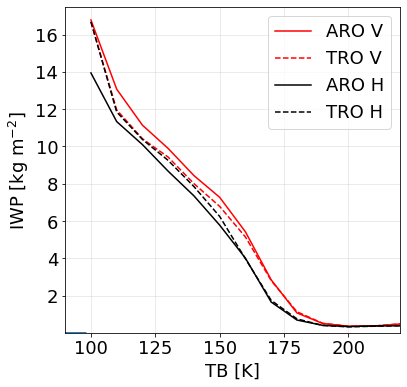

In [8]:
tbbins = np.arange(100, 300, 10)
iwpbins = np.arange(0.1, 20, 0.05)
tbbins_c = (tbbins[1:] + tbbins[:-1])/2

def get_mean_iwp(t, tbbins, iwp):
    
    itb = np.digitize(t, tbbins)
    imean = np.bincount(itb, iwp)/np.bincount(itb)
    
    return imean


def get_pdf(t, iwp):
    tbbins = np.arange(100, 300, 2)
    iwpbins = np.arange(0.1, 20, 0.5)
    
    hist, _, _ = np.histogram2d(t, iwp, bins = (tbbins, iwpbins), density = True)
    return hist
    


imean_v = get_mean_iwp(tb1[:, 0], tbbins, lpa_data.y.ravel())
imean_h = get_mean_iwp(tb1[:, 1], tbbins, lpa_data.y.ravel())
imean_v1 = get_mean_iwp(tb[:, 0], tbbins, pr1_data.y.ravel())
imean_h1 = get_mean_iwp(tb[:, 1], tbbins, pr1_data.y.ravel())

hist = get_pdf(tb1[:, 0], lpa_data.y.ravel())







fig, ax = plt.subplots(1, 1, figsize = [6, 6])
ax.plot(tbbins, imean_v[1:], 'r', label = "ARO V")
ax.plot(tbbins, imean_v1[1:], 'r--', label  = "TRO V")
ax.plot(tbbins, imean_h[1:], 'k', label = "ARO H")
ax.plot(tbbins, imean_h1[1:], 'k--', label  = "TRO H")

ax.plot(np.max(hist, axis = 1))


ax.legend()
ax.grid("on", alpha = 0.3)
ax.set_ylim([1e-4, 17.5])
ax.set_xlim([90, 220])

#ax.set_yscale("log")
ax.set_xlabel("TB [K]")
ax.set_ylabel(r"IWP [kg m$^{-2}$]")
fig.savefig("TB_IWP.pdf", bbox_inches = "tight")

In [9]:
from scipy.ndimage.filters import gaussian_filter
def get_pdf(t, iwp, tbbins, iwpbins):

    
    hist, xedges, yedges = np.histogram2d(t, iwp,
                                      bins = (tbbins, iwpbins), density = True)

    iwpmax = np.zeros(tbbins.size-1)
    for i in range(iwpmax.size):
        iwpmax[i] = iwpbins[np.argmax(hist[i, :])]
     
    sigma = 0.7
    iwpmax = gaussian_filter(iwpmax, sigma)
    return iwpmax, tbbins
    

In [17]:
tbbins = np.arange(105, 300, 5)
iwpbins = np.arange(1, 20, 0.5)
hist_v, tbbins = get_pdf(tb1[:, 0], lpa_data.y.ravel(),tbbins, iwpbins)
hist_v1, _ = get_pdf(tb[:, 0], pr1_data.y.ravel(), tbbins, iwpbins)
hist_h, _ = get_pdf(tb1[:, 1], lpa_data.y.ravel(), tbbins, iwpbins)
hist_h1, _ = get_pdf(tb[:, 1], pr1_data.y.ravel(), tbbins, iwpbins)

hist_h_e, _ = get_pdf(tb_esa[:, 1], esa_data.y.ravel(), tbbins, iwpbins)
hist_v_e, _ = get_pdf(tb_esa[:, 0], esa_data.y.ravel(), tbbins, iwpbins)


tbc = (tbbins[1:] + tbbins[:-1])/2

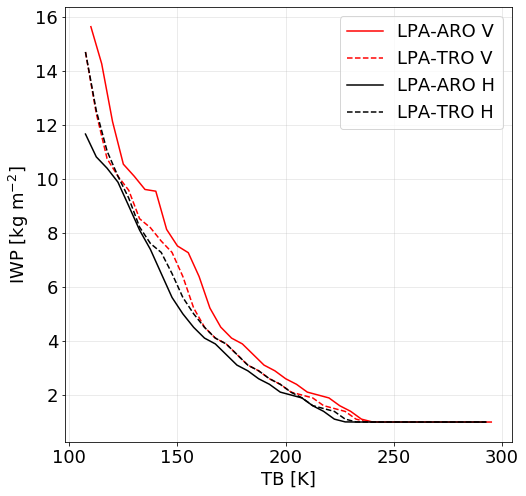

In [18]:
fig, ax = plt.subplots(1, 1, figsize = [8, 8])
ax.plot(tbbins[1:], hist_v, 'r', label = "LPA-ARO V")
ax.plot(tbc, hist_v1, 'r--', label = "LPA-TRO V")
ax.plot(tbc, hist_h, 'k', label = "LPA-ARO H")
ax.plot(tbc, hist_h1, 'k--',  label = "LPA-TRO H")

#ax.plot(tbc[9:], hist_h_e[9:], 'b', label = "ESA-ARO H")
#ax.plot(tbc[9:], hist_v_e[9:], 'b--',  label = "ESA-ARO V")

ax.legend()
ax.legend()
ax.grid("on", alpha = 0.3)
#ax.set_ylim([1e-4, 17.5])
#ax.set_xlim([90, 220])

#ax.set_yscale("log")
ax.set_xlabel("TB [K]")
ax.set_ylabel(r"IWP [kg m$^{-2}$]")
fig.savefig("TB_IWP.pdf", bbox_inches = "tight")


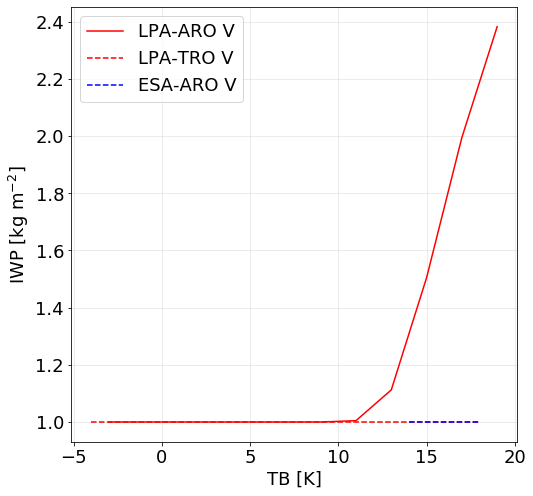

In [12]:
tbbins = np.arange(-5, 20, 2)
iwpbins = np.arange(1, 20, 0.5)

hist_v, tbbins = get_pdf(tb1[:, 0] - tb1[:, 1] , lpa_data.y.ravel(), tbbins, iwpbins)
hist_v1, _ = get_pdf(tb[:, 0] - tb[:, 1], pr1_data.y.ravel(), tbbins, iwpbins)


#hist_h_e, _ = get_pdf(tb_esa[:, 1], esa_data.y.ravel())
hist_v_e, _ = get_pdf(tb_esa[:, 0] - tb_esa[:, 0], esa_data.y.ravel(), tbbins, iwpbins)


tbc = (tbbins[1:] + tbbins[:-1])/2

fig, ax = plt.subplots(1, 1, figsize = [8, 8])
ax.plot(tbbins[1:], hist_v, 'r', label = "LPA-ARO V")
ax.plot(tbc, hist_v1, 'r--', label = "LPA-TRO V")
#ax.plot(tbc, hist_h, 'k', label = "LPA-ARO H")
#ax.plot(tbc, hist_h1, 'k--',  label = "LPA-TRO H")

#ax.plot(tbc[9:], hist_h_e[9:], 'b', label = "ESA-ARO H")
ax.plot(tbc[9:], hist_v_e[9:], 'b--',  label = "ESA-ARO V")

ax.legend()
ax.legend()
ax.grid("on", alpha = 0.3)
#ax.set_ylim([1e-4, 17.5])
#ax.set_xlim([90, 220])

#ax.set_yscale("log")
ax.set_xlabel("TB [K]")
ax.set_ylabel(r"IWP [kg m$^{-2}$]")
fig.savefig("TB_IWP.pdf", bbox_inches = "tight")


In [13]:
np.argmax(hist, axis  = 0)

array([81, 76, 71, 67, 62, 59, 43, 40, 39, 34, 35, 29, 26, 26, 26, 24, 25,
       22, 22, 15, 17, 18, 20, 19, 68, 62, 10,  8,  6, 25,  0,  0,  3,  0,
        3,  0,  0,  0,  0])

In [14]:
    iwpmax = np.zeros([tbbins.size-1])
    
    for i in range(tbbins.size-1):
        print (np.argmax(hist[i, :]))

0
0
0
32
0
0
28
25
24
22
21
20


In [15]:
iwpmax

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])